<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S12_C1_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.pipeline import Pipeline, make_pipeline

In [26]:
# Load data
data = pd.read_excel('/content/marketing_extract_2X_Income.xlsx', sheet_name='Sheet1')

# Define features and target
X = data.drop(columns=['Income'])
y = data['Income']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'SVR': SVR(kernel='linear', C=1.0)
}

# Initialize a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2'])

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append results
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'MSE': [mse], 'MAE': [mae], 'R2': [r2]})], ignore_index=True)

# Sort results by R2
results = results.sort_values(by='R2', ascending=False)

# Display results
print("Model Performance:\n")
print(results)


<ipython-input-27-9d5297d8728a>:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Model': [name], 'MSE': [mse], 'MAE': [mae], 'R2': [r2]})], ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Performance:

               Model           MSE           MAE        R2
2      Random Forest  1.901343e+08   8300.212494  0.614618
7         ElasticNet  2.015914e+08  10443.451905  0.591395
6              Lasso  2.015914e+08  10443.452469  0.591395
5              Ridge  2.015914e+08  10443.452430  0.591395
0  Linear Regression  2.015914e+08  10443.452436  0.591395
8                SVR  2.017091e+08  10433.786816  0.591157
1      Decision Tree  2.297573e+08   9712.207845  0.534306
3            XGBoost  3.232247e+08   8633.760672  0.344857
4     Neural Network  9.064015e+08  26460.824767 -0.837182


# Parte 2. Comparación del polinómico de clase con clase anterior con Ridge

Ver Clase S2_C5

In [28]:
import matplotlib.pyplot as plt


In [29]:
df = data
# ------ DataSet y Parámetros


In [30]:

# --- >  Eliminar datos átipicos de Income
#---------------------------------------
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['Income'] < (Q1-1.5*IQR))|(df['Income'] > (Q3+1.5*IQR)))]

In [31]:


# --- >  Eliminar datos átipicos de MntMeatProducts
#---------------------------------------
Q1 = df['MntMeatProducts'].quantile(0.25)
Q3 = df['MntMeatProducts'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['MntMeatProducts'] < (Q1-1.5*IQR))|(df['MntMeatProducts'] > (Q3+1.5*IQR)))]

In [32]:
#Target
Y = df['Income']
#Característica
X1 = df[['MntMeatProducts']]
## test_size = el porcentaje de los datos que voy a dejar para probar
## ene este caso usamos una combinacion 80-20
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

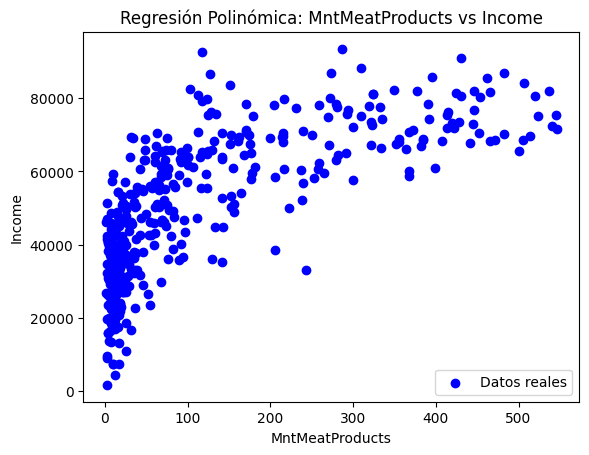

In [33]:
# Visualizar los resultados (ajuste del modelo polinómico)
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.title('Regresión Polinómica: MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.legend()
plt.show()

In [83]:
alpha = [0.1,1,10,100,1000, 10000, 100000]

In [84]:
train_errors = []
test_errors = []
coeff = []

In [85]:
for a in alpha:
    model_ridge = Ridge(alpha=a)
    model_ridge.fit(X_train, y_train)
    y_pred = model_ridge.predict(X_test)
    test_errors.append(mean_squared_error(y_test, y_pred))
    train_errors.append(mean_squared_error(y_train, model_ridge.predict(X_train)))
    coeff.append(model_ridge.coef_)
    #mae = mean_absolute_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)

In [86]:
alpha

[0.1, 1, 10, 100, 1000, 10000, 100000]

In [87]:
test_errors

[183527078.14443102,
 183527077.985988,
 183527076.40157714,
 183527060.55941826,
 183526902.3327606,
 183525339.54711038,
 183511647.62663427]

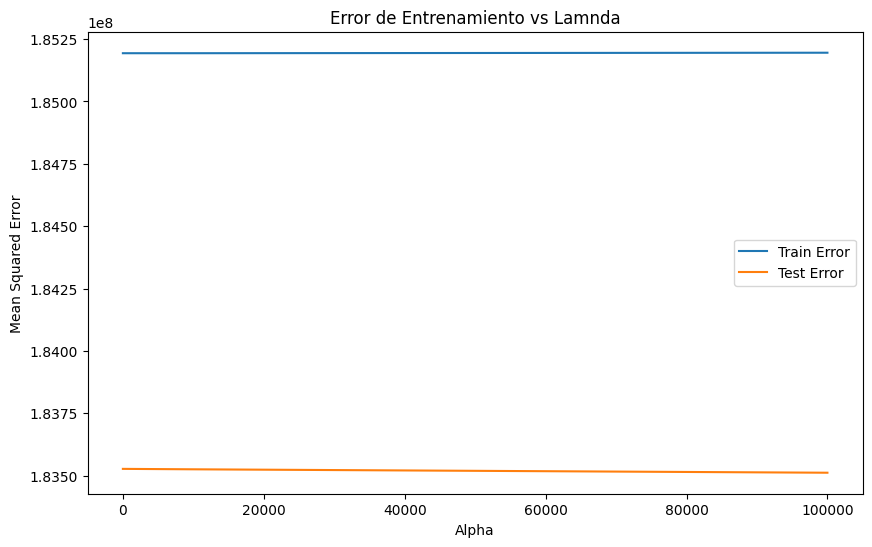

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(alpha, train_errors, label='Train Error')
plt.plot(alpha, test_errors, label='Test Error')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Error de Entrenamiento vs Lamnda')
plt.legend()
plt.show()

In [89]:
train_errors = []
test_errors = []
coeff = []

In [90]:
for a in alpha:
    model_Lasso = Lasso(alpha=a)
    model_Lasso.fit(X_train, y_train)
    y_pred = model_Lasso.predict(X_test)
    test_errors.append(mean_squared_error(y_test, y_pred))
    train_errors.append(mean_squared_error(y_train, model_Lasso.predict(X_train)))
    coeff.append(model_Lasso.coef_)
    #mae = mean_absolute_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)

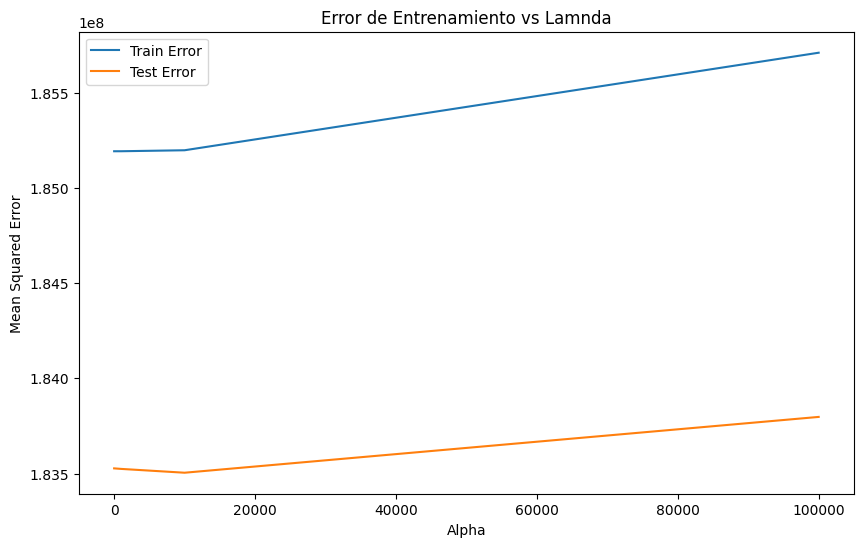

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(alpha, train_errors, label='Train Error')
plt.plot(alpha, test_errors, label='Test Error')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Error de Entrenamiento vs Lamnda')
plt.legend()
plt.show()

In [93]:
coeff

[array([101.02928187]),
 array([101.02923528]),
 array([101.02876932]),
 array([101.02410977]),
 array([100.97751426]),
 array([100.51155914]),
 array([95.85200798])]

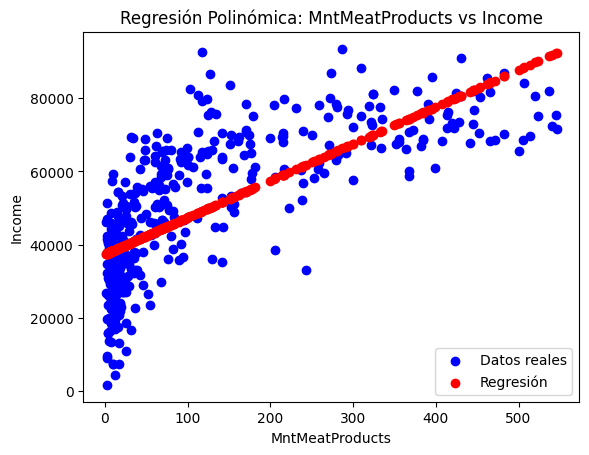

In [96]:
model_Lasso = Lasso(alpha=100000)
model_Lasso.fit(X_train, y_train)

# Visualizar los resultados (ajuste del modelo polinómico)
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, model_ridge.predict(X_test), color='red', label='Regresión')
plt.title('Regresión Polinómica: MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.legend()
plt.show()

In [97]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [107]:
error_poly= mean_squared_error(y_test, y_pred_poly)
error_poly

141882693.93834743

In [108]:
error_lasso= min(test_errors)
error_lasso

183504234.93556252

In [106]:
error_lasso - error_poly

41621540.99721509